In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
dataset = pd.read_csv('Aprori22 dataset.csv')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print(dataset)

                   0                  1  ...       18         19
0             shrimp            almonds  ...  spinach  olive oil
1            burgers          meatballs  ...      NaN        NaN
2             turkey            avocado  ...      NaN        NaN
3      mineral water               milk  ...      NaN        NaN
4     low fat yogurt                NaN  ...      NaN        NaN
...              ...                ...  ...      ...        ...
7472          butter         light mayo  ...      NaN        NaN
7473         burgers  frozen vegetables  ...      NaN        NaN
7474         chicken                NaN  ...      NaN        NaN
7475        escalope          green tea  ...      NaN        NaN
7476            eggs    frozen smoothie  ...      NaN        NaN

[7477 rows x 20 columns]


In [7]:
print(dataset.shape)

(7477, 20)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7477 entries, 0 to 7476
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7477 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [9]:
types = dataset.dtypes
print(types)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object


In [10]:
dataset.isnull().sum()

0        0
1     1730
2     3088
3     4132
4     4948
5     5613
6     6108
7     6496
8     6823
9     7082
10    7221
11    7323
12    7390
13    7430
14    7452
15    7469
16    7473
17    7473
18    7474
19    7476
dtype: int64

In [11]:
transactions = []
for i in range(0, 7475):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 19)])

transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',


In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [13]:
print(df)

      almonds  antioxydant juice  asparagus  ...   yams  yogurt cake  zucchini
0        True               True      False  ...   True        False     False
1       False              False      False  ...  False        False     False
2       False              False      False  ...  False        False     False
3       False              False      False  ...  False        False     False
4       False              False      False  ...  False        False     False
...       ...                ...        ...  ...    ...          ...       ...
7470    False              False      False  ...  False        False     False
7471    False              False      False  ...  False        False     False
7472    False              False      False  ...  False        False     False
7473    False              False      False  ...  False        False     False
7474    False              False      False  ...  False        False     False

[7475 rows x 120 columns]


In [15]:
df.pop('nan')

0       False
1        True
2        True
3        True
4        True
        ...  
7470     True
7471     True
7472     True
7473     True
7474     True
Name: nan, Length: 7475, dtype: bool

In [16]:
df

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,F

In [17]:
freq_items = apriori(df, min_support=0.05, use_colnames=True)
freq_items

,support,itemsets
0,0.087358,(burgers)
1,0.081338,(cake)
2,0.060201,(chicken)
3,0.164281,(chocolate)
4,0.079465,(cookies)
5,0.051237,(cooking oil)
6,0.180201,(eggs)
7,0.079331,(escalope)
8,0.171505,(french fries)
9,0.063411,(frozen smoothie)


In [18]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.239197,0.164281,0.052843,0.220917,1.344753,0.013547,1.072696
1,(chocolate),(mineral water),0.164281,0.239197,0.052843,0.321661,1.344753,0.013547,1.121567
2,(mineral water),(eggs),0.239197,0.180201,0.051104,0.213647,1.185603,0.008000,1.042533
3,(eggs),(mineral water),0.180201,0.239197,0.051104,0.283593,1.185603,0.008000,1.061970
4,(mineral water),(spaghetti),0.239197,0.174314,0.059933,0.250559,1.437399,0.018238,1.101736
5,(spaghetti),(mineral water),0.174314,0.239197,0.059933,0.343822,1.437399,0.018238,1.159445


In [19]:
print(len(rules))

6


In [20]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.087358,(burgers),1
1,0.081338,(cake),1
2,0.060201,(chicken),1
3,0.164281,(chocolate),1
4,0.079465,(cookies),1
5,0.051237,(cooking oil),1
6,0.180201,(eggs),1
7,0.079331,(escalope),1
8,0.171505,(french fries),1
9,0.063411,(frozen smoothie),1


In [21]:
freq_items[ (freq_items['length'] == 2) &
                   (freq_items['support'] >= 0.05) ]

,support,itemsets,length
25,0.052843,"(mineral water, chocolate)",2
26,0.051104,"(mineral water, eggs)",2
27,0.059933,"(mineral water, spaghetti)",2


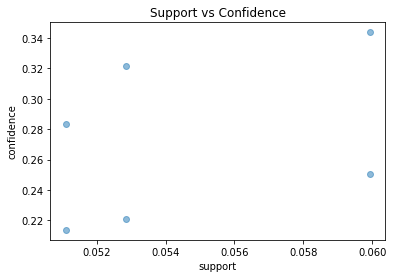

In [22]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

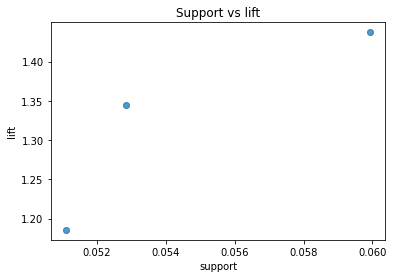

In [23]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

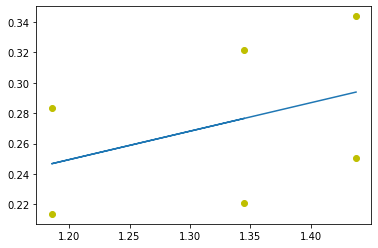

In [24]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [34]:
import pickle 
print("[INFO] Saving model...")
saved_model=pickle.dump(freq_items,open('/content/drive/My Drive/PIET18CS138 _Sparsh_Sharma_ML_EndTerm.pkl', 'wb'))

[INFO] Saving model...


In [36]:
model = pickle.load(open('/content/drive/My Drive/PIET18CS138 _Sparsh_Sharma_ML_EndTerm.pkl','rb'))

In [37]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 3.9MB/s 
     |████████████████████████████████| 4.2MB 45.7MB/s 
     |████████████████████████████████| 174kB 48.7MB/s 
     |████████████████████████████████| 112kB 54.2MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 122kB 45.1MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 788kB 42.7MB/s 
     |████████████████████████████████| 368kB 51.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=1618f8c01744f67c873bc0d6ba34a9e2215506596cd3efdcc6b5362587d906da
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipyke

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pyngrok

     |████████████████████████████████| 747kB 4.3MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=e82d6e799ccc049c6ef6277e4b91757b4d5c90c140e1a4b71f53c980b06154d7
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [3]:
!ngrok authtoken 1rpxylaE7B46qwaAnOv4floLqyW_4p3qqTnPchNqaqio7tZwV

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [4]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
st.set_option('deprecation.showfileUploaderEncoding', False)
def find_associatio_rule(support):
  # Load the pickled model
  model = pickle.load(open('/content/drive/My Drive/PIET18CS138 _Sparsh_Sharma_ML_EndTerm.pkl','rb'))     
  if uploaded_file is not None:
    dataset= pd.read_csv(uploaded_file)
  else:
    dataset= pd.read_csv('/content/drive/My Drive/Aprori22 dataset.csv')

  #Create list 
  transactions = []
  for i in range(0, 315):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 7)])

  from mlxtend.preprocessing import TransactionEncoder
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  freq_items = apriori(df, min_support=support, use_colnames=True)
  rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
  return rules
def find_frequent_items(support):
  # Load the pickled model
  model = pickle.load(open('/content/drive/My Drive/PIET18CS138 _Sparsh_Sharma_ML_EndTerm.pkl','rb'))     
  if uploaded_file is not None:
    dataset= pd.read_csv(uploaded_file)
  else:
    dataset= pd.read_csv('/content/drive/My Drive/Aprori22 dataset.csv')
  #Create list 
  transactions = []
  for i in range(0, 315):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 7)])

  from mlxtend.preprocessing import TransactionEncoder
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  freq_items = apriori(df, min_support=support, use_colnames=True)
  rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
  
  return freq_items
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
st.header("Identification of items Purchased together ")
  
uploaded_file = st.file_uploader("Upload dataset", help='Please upload retail_dataset.csv otherwise leave  blank') 
support = st.number_input('Insert a minimum suppport to find association rule ',0,1)

  
if st.button("Association Rule"):
  rules=find_associatio_rule(support)
  st.success('Apriori has found Following rules {}'.format(rules))
if st.button("Frequent Items"):
  frequent_items=find_frequent_items(support)
  st.success('Apriori has found Frequent itemsets {}'.format(frequent_items))      
if st.button("About"):
  st.subheader("Developed by Sparsh Sharma")
  st.subheader("PIPIET18CS138")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Machine learning Experiment No. 9</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [5]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [6]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://4fd3b8c305a9.ngrok.io" -> "http://localhost:80">

In [7]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.236.132.103:80

  Stopping...
  Stopping...
